<a href="https://colab.research.google.com/github/daniellepatricio/Analise-de-Dados_Pandas_Python/blob/main/visualizacao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISUALIZAÇÃO DE DADOS:**

In [1]:
# Importando a biblioteca
import pandas as pd

In [2]:
# Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
# Concatenar todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
#Alterar o tipo de dados da coluna Data
df["Data"] = pd.to_datetime(df["Data"])

In [5]:
#Verificar o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [6]:
# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [7]:
#Consultar vendas realizadas por loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

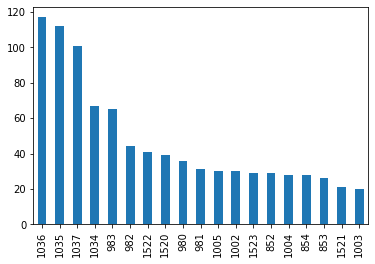

In [8]:
# Gráfico de barras - Vendas x Loja
df["LojaID"].value_counts(ascending=False).plot.bar()

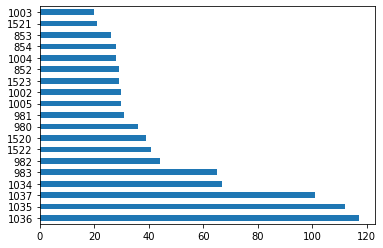

In [12]:
# Gráfico de barras horizontais - Vendas x Loja
df["LojaID"].value_counts(ascending=False).plot.barh();

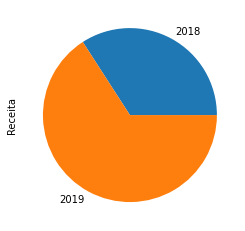

In [10]:
# Gráfico de pizza - Receita x Ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [11]:
# Total de vendas por cidade
df["Cidade"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Aracaju
1       Aracaju
2       Aracaju
3       Aracaju
4       Aracaju
         ...   
235    Salvador
236    Salvador
237    Salvador
238    Salvador
239    Salvador
Name: Cidade, Length: 894, dtype: object>

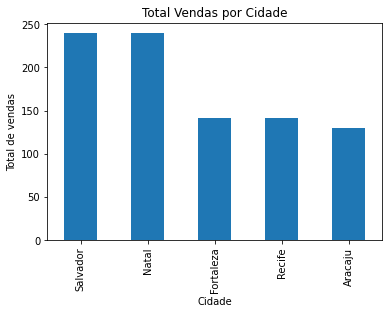

In [14]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

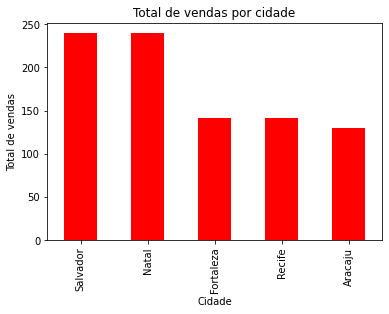

In [15]:
# Alterar a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [16]:
# Alterar o estilo
plt.style.use("ggplot")

In [19]:
#Pegar amostra de 5 linhas
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
21,Aracaju,2018-01-01,37.36,1520,2,74.72
21,Natal,2019-02-08,679.00,853,2,1358.00
2,Fortaleza,2019-02-10,35.33,1004,3,105.99
234,Salvador,2019-01-03,48.39,1035,2,96.78
13,Salvador,2019-02-12,39.29,1035,1,39.29


In [20]:
# Criar nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [21]:
# Extrair mês e dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [22]:
#Pegar amostra de 5 linhas
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
58,Salvador,2019-01-01,20.64,1037,2,41.28,2019,1,1
63,Recife,2019-01-01,37.95,980,2,75.90,2019,1,1
24,Recife,2019-01-01,13.00,983,2,26.00,2019,1,1
143,Natal,2019-01-02,41.18,1037,2,82.36,2019,1,2
12,Fortaleza,2019-01-01,80.73,1004,2,161.46,2019,1,1


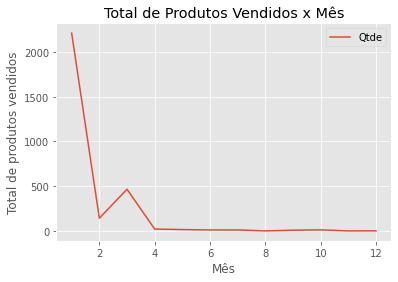

In [23]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [24]:
#Total de Produtos Vendidos x Mês
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [25]:
# Pegar apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

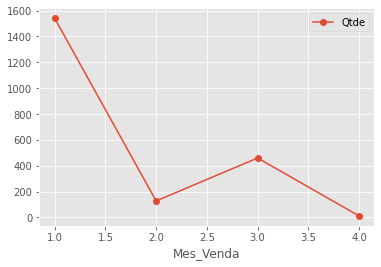

In [26]:
# Total de produtos vendidos por mês 2019
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend();

In [27]:
# Total de produtos vendidos por mês 2019

df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

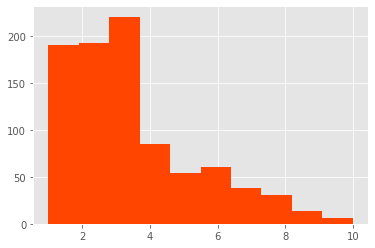

In [28]:
# Histograma
plt.hist(df["Qtde"], color="orangered");

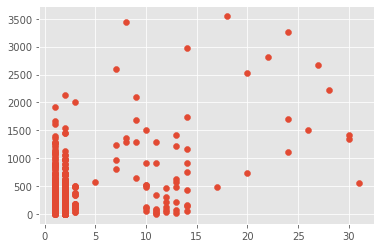

In [29]:
# Gráfico de dispersão
plt.scatter(x = df_2019["Dia_Venda"], y = df_2019["Receita"]);

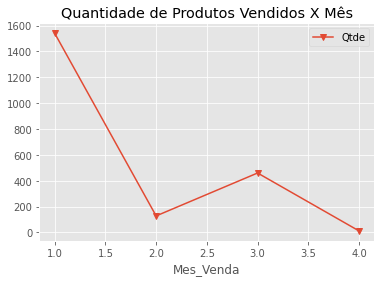

In [30]:
# Salvar em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos X Mês")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend()
plt.savefig("grafico qtde x mes.png")